In [4]:
import pandas as pd
from joblib import Parallel, delayed
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans
import time
import swifter # For Parallel computing and use MultiThread 
import fastcluster
from scipy.cluster.hierarchy import dendrogram, linkage

from scipy.spatial.distance import pdist, squareform
from scipy.cluster import hierarchy
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



In [5]:
df=pd.read_csv("C:/Users/pctes/Downloads/DANA_PROJECTS/DANA_4840/data_2.csv")
df_labels=pd.read_csv("C:/Users/pctes/Downloads/DANA_PROJECTS/DANA_4840/labels.csv")

In [6]:
df.tail()

Unnamed: 0  gene_0    gene_1    gene_2    gene_3     gene_4  gene_5  \
796  sample_796     0.0  1.865642  2.718197  7.350099  10.006003     0.0   
797  sample_797     0.0  3.942955  4.453807  6.346597  10.056868     0.0   
798  sample_798     0.0  3.249582  3.707492  8.185901   9.504082     0.0   
799  sample_799     0.0  2.590339  2.787976  7.318624   9.987136     0.0   
800  sample_800     0.0  2.325242  3.805932  6.530246   9.560367     0.0   

       gene_6    gene_7  gene_8  ...  gene_20521  gene_20522  gene_20523  \
796  6.764792  0.496922     0.0  ...    6.088133    9.118313   10.004852   
797  7.320331  0.000000     0.0  ...    6.371876    9.623335    9.823921   
798  7.536589  1.811101     0.0  ...    5.719386    8.610704   10.485517   
799  9.213464  0.000000     0.0  ...    5.785237    8.605387   11.004677   
800  7.957027  0.000000     0.0  ...    6.403075    8.594354   10.243079   

     gene_20524  gene_20525  gene_20526  gene_20527  gene_20528  gene_20529  \
796    4.484415    9.614701   12.031267    9.813063   10.092770    8.819269   
797    6.555327    9.064002   11.633422   10.317266    8.745983    9.659081   
798    3.589763    9.350636   12.180944   10.681194    9.466711    4.677458   
799    4.745888    9.626383   11.198279   10.335513   10.400581    5.718751   
800    9.139459   10.102934   11.641081   10.607358    9.844794    4.550716   

     gene_20530  
796    0.000000  
797    0.000000  
798    0.586693  
799    0.000000  
800    0.000000  

[5 rows x 20532 columns]

In [7]:
df_labels.tail()

Unnamed: 0 Class
796  sample_796  BRCA
797  sample_797  LUAD
798  sample_798  COAD
799  sample_799  PRAD
800  sample_800  PRAD

In [70]:
# Let's check if both labels have the same names 
list_labels=df_labels.iloc[:,0].tolist()
list_df=df.iloc[:,0].tolist()
print((list_labels)==(list_df))

True


In [8]:
# Class column was sent to the end of the columns 
df_merged=df.merge(df_labels,on="Unnamed: 0",how="left")
column_list_df=df.columns.tolist()

# Now we are moving Class column to the first position 
df_merged=df_merged[["Class"] + column_list_df]

In [9]:
df_merged.head()

Class Unnamed: 0  gene_0    gene_1    gene_2    gene_3     gene_4  gene_5  \
0  PRAD   sample_0     0.0  2.017209  3.265527  5.478487  10.431999     0.0   
1  LUAD   sample_1     0.0  0.592732  1.588421  7.586157   9.623011     0.0   
2  PRAD   sample_2     0.0  3.511759  4.327199  6.881787   9.870730     0.0   
3  PRAD   sample_3     0.0  3.663618  4.507649  6.659068  10.196184     0.0   
4  BRCA   sample_4     0.0  2.655741  2.821547  6.539454   9.738265     0.0   

     gene_6    gene_7  ...  gene_20521  gene_20522  gene_20523  gene_20524  \
0  7.175175  0.591871  ...    4.926711    8.210257    9.723516    7.220030   
1  6.816049  0.000000  ...    4.593372    7.323865    9.740931    6.256586   
2  6.972130  0.452595  ...    5.125213    8.127123   10.908640    5.401607   
3  7.843375  0.434882  ...    6.076566    8.792959   10.141520    8.942805   
4  6.566967  0.360982  ...    5.996032    8.891425   10.373790    7.181162   

   gene_20525  gene_20526  gene_20527  gene_20528  gene_20529  gene_20530  
0    9.119813   12.003135    9.650743    8.921326    5.286759         0.0  
1    8.381612   12.674552   10.517059    9.397854    2.094168         0.0  
2    9.911597    9.045255    9.788359   10.090470    1.683023         0.0  
3    9.601208   11.392682    9.694814    9.684365    3.292001         0.0  
4    9.846910   11.922439    9.217749    9.461191    5.110372         0.0  

[5 rows x 20533 columns]

In [11]:
# We are dropping the Unnamed column
df_merged.drop(columns=["Unnamed: 0"],inplace=True)

In [12]:
# Save merged:file

df_merged.to_csv("df_merged.csv",index=False)

In [12]:
df_merged.head()

Class  gene_0    gene_1    gene_2    gene_3     gene_4  gene_5    gene_6  \
0  PRAD     0.0  2.017209  3.265527  5.478487  10.431999     0.0  7.175175   
1  LUAD     0.0  0.592732  1.588421  7.586157   9.623011     0.0  6.816049   
2  PRAD     0.0  3.511759  4.327199  6.881787   9.870730     0.0  6.972130   
3  PRAD     0.0  3.663618  4.507649  6.659068  10.196184     0.0  7.843375   
4  BRCA     0.0  2.655741  2.821547  6.539454   9.738265     0.0  6.566967   

     gene_7  gene_8  ...  gene_20521  gene_20522  gene_20523  gene_20524  \
0  0.591871     0.0  ...    4.926711    8.210257    9.723516    7.220030   
1  0.000000     0.0  ...    4.593372    7.323865    9.740931    6.256586   
2  0.452595     0.0  ...    5.125213    8.127123   10.908640    5.401607   
3  0.434882     0.0  ...    6.076566    8.792959   10.141520    8.942805   
4  0.360982     0.0  ...    5.996032    8.891425   10.373790    7.181162   

   gene_20525  gene_20526  gene_20527  gene_20528  gene_20529  gene_20530  
0    9.119813   12.003135    9.650743    8.921326    5.286759         0.0  
1    8.381612   12.674552   10.517059    9.397854    2.094168         0.0  
2    9.911597    9.045255    9.788359   10.090470    1.683023         0.0  
3    9.601208   11.392682    9.694814    9.684365    3.292001         0.0  
4    9.846910   11.922439    9.217749    9.461191    5.110372         0.0  

[5 rows x 20532 columns]

In [13]:
# Exploratory Data Analysis
df_merged_copy=df_merged.copy()


In [9]:
df_merged["Class"].unique()
# Labels  5 classes: BRCA, KIRC, COAD, LUAD, and PRAD




array(['PRAD', 'LUAD', 'BRCA', 'KIRC', 'COAD'], dtype=object)

#### PRAD: PRAD stands for Prostate Adenocarcinoma. It refers to cancers that arise in the prostate gland.
#### LUAD: LUAD stands for Lung Adenocarcinoma. It refers to cancers that arise in the lung tissue.
#### BRCA: BRCA stands for Breast Cancer. Specifically, it refers to cancers that arise in breast tissue.
#### KIRC: KIRC stands for Kidney Renal Clear Cell Carcinoma. 
#### COAD: COAD stands for Colon Adenocarcinoma. It refers to cancers that arise in the colon.




In [15]:
#  Beginning of Exploratory Data Analysis
# There is only one Object Column ,the rest are numerical values
df_merged.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Columns: 20532 entries, Class to gene_20530
dtypes: float64(20531), object(1)
memory usage: 125.5+ MB


In [2]:
df_merged=pd.read_csv("df_merged.csv")

In [11]:
# Let's see the distribution of the data across CLASS columns
df_merged.groupby("Class").size()

# Anova 800 y 5 clases  si el mean es diferente de las 4 clases  Feature Expression methods
# Despues hacemos PCA , ver cuantos Eigen values  100 es mucho 10 esta Bien , no hagas random seed 
# hacemos PCA  despues de anova test 

Class
BRCA    300
COAD     78
KIRC    146
LUAD    141
PRAD    136
dtype: int64

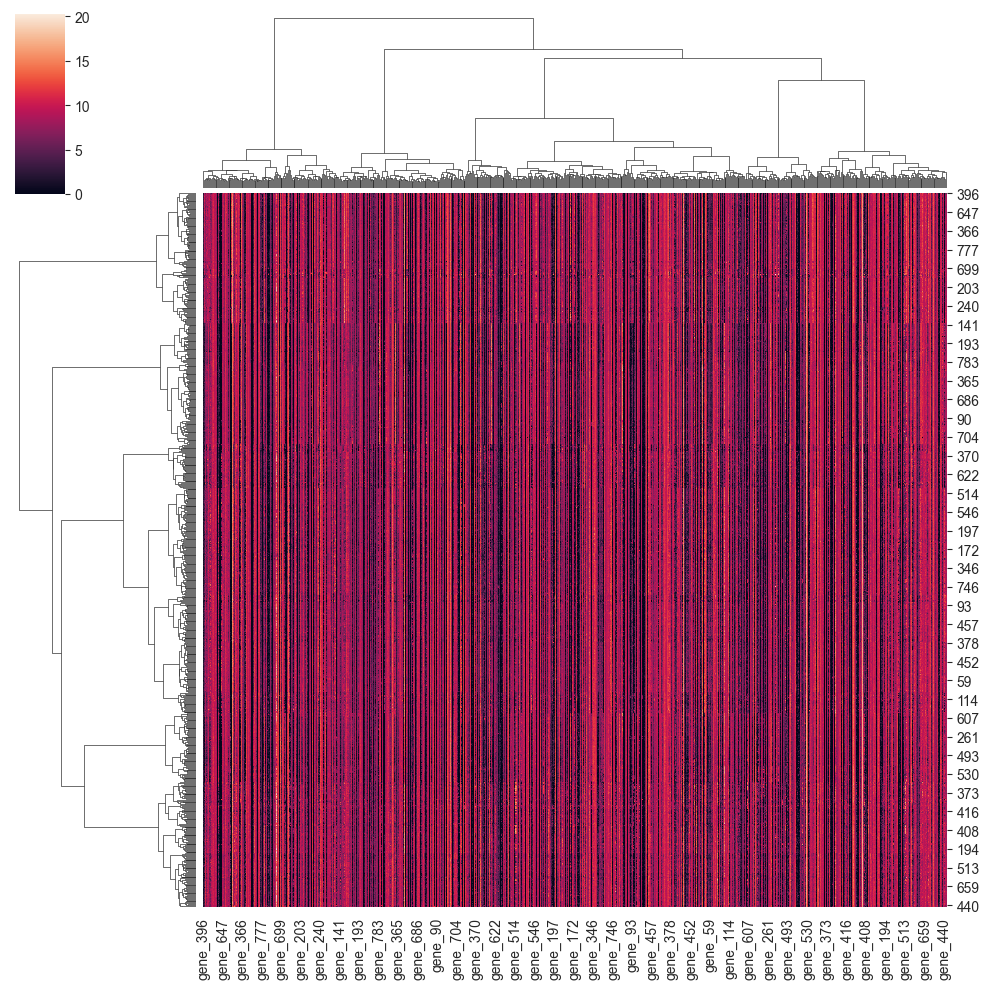

In [24]:

genes= df_merged.columns[1:]
labels= df_merged["Class"]

# Perform hierarchical clustering
Z = fastcluster.linkage_vector(df_merged[genes], method='ward', metric='euclidean')

# Plot the dendrogram
sns.clustermap(df_merged[genes], method='ward', metric='euclidean', figsize=(10, 10),col_linkage=Z,row_linkage=Z);

# helps in understanding how samples (rows) or features (columns) cluster together based on their similarity in gene expression profiles.

In [18]:
# We will see the distribution of the data across the classes

df_pivot=pd.pivot_table(df_merged,index=["Class"],aggfunc="mean")
df_pivot

gene_0    gene_1   gene_10   gene_100  gene_1000  gene_10000  \
Class                                                                   
BRCA   0.011362  2.839739  0.544066  10.681488  10.303568    3.258028   
COAD   0.022212  3.438381  0.357278  11.015745   9.951124    3.462039   
KIRC   0.046544  2.398129  1.166824  10.238999  11.148094    1.651798   
LUAD   0.041088  3.358260  0.607541  10.517670  10.503698    3.754181   
PRAD   0.026544  3.441041  0.765608  10.282936   9.967433    1.949878   

       gene_10001  gene_10002  gene_10003  gene_10004  ...  gene_9990  \
Class                                                  ...              
BRCA     7.339461    7.900497    7.489146    7.508378  ...   1.969278   
COAD     5.526673    7.487396    3.783493    6.959238  ...   2.216178   
KIRC     6.895752    7.686932    7.269611    7.636246  ...   1.824964   
LUAD     7.281878    7.041924    6.145042    7.148682  ...   2.609490   
PRAD     7.946141    8.529695    5.696368    7.396572  ...   1.623491   

       gene_9991  gene_9992  gene_9993  gene_9994  gene_9995  gene_9996  \
Class                                                                     
BRCA    5.142237   1.736160   2.312551   1.696127   2.493789   0.046527   
COAD    0.354828   1.833606   1.619692   3.839205   2.396207   0.090327   
KIRC    0.596508   2.393303   1.872888   1.289448   3.139623   0.130416   
LUAD    2.801700   2.738326   1.869805   2.217144   2.459608   0.042070   
PRAD    4.594215   1.684084   2.588050   1.703772   3.568490   0.572893   

       gene_9997  gene_9998  gene_9999  
Class                                   
BRCA    2.099709   0.151063   6.954733  
COAD    2.298246   0.065007   6.618466  
KIRC    2.387948   0.148641   6.429343  
LUAD    2.281828   0.056608   6.721517  
PRAD    3.621548   0.094953   7.104225  

[5 rows x 20531 columns]

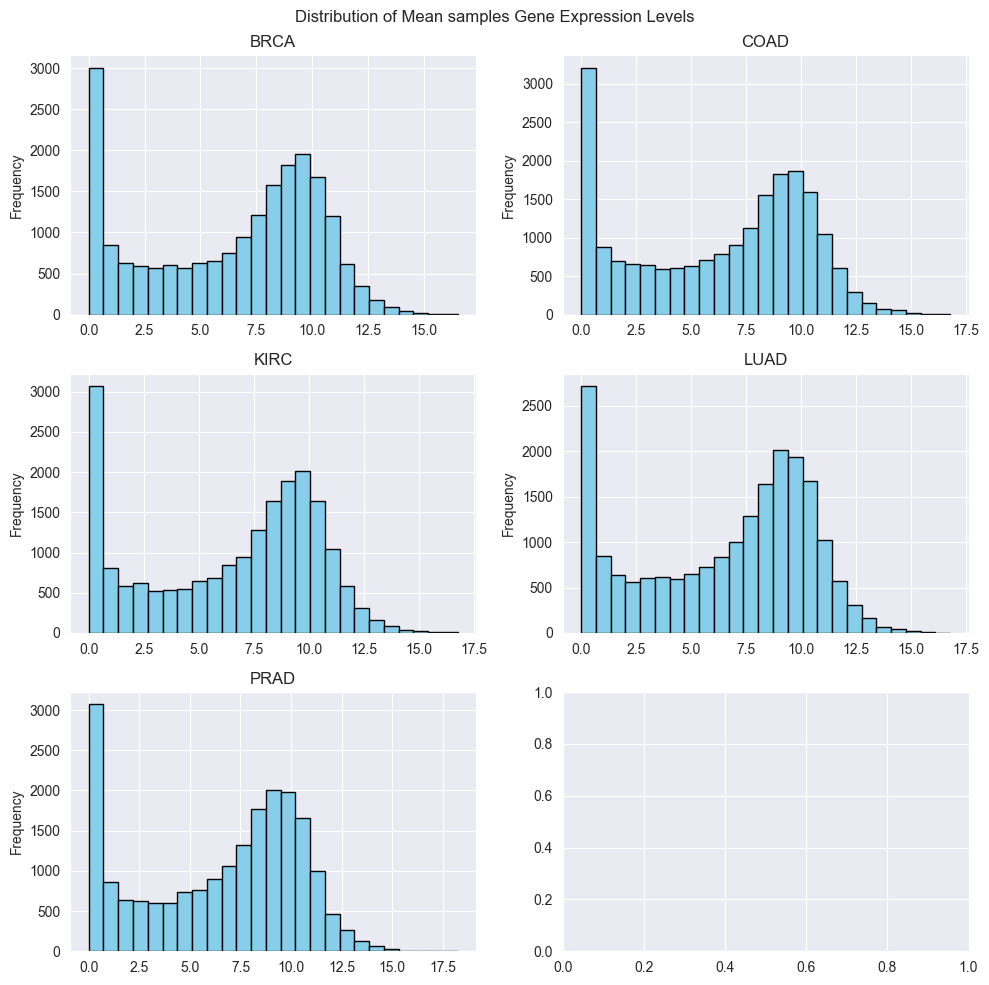

In [21]:
# We will use the mean of the all samples across the genes to see the distribution of the data across the classes
# We will make subplot of the histogram to see the distribution of the data across the classes

cancer_names = df_pivot.index.tolist()
fig, axes = plt.subplots(3, 2, figsize=(10, 10))
fig.suptitle('Distribution of Mean samples Gene Expression Levels')
for i, ax in enumerate(cancer_names):
    df_pivot.loc[ax].plot(kind="hist", ax=axes[i//2, i%2], title=ax,color='skyblue', edgecolor='black',bins=25)
plt.tight_layout()
plt.show()

#There are a lot of 0 values 

In [ ]:
#Now proceed to remove the 0 values and transform the data to a log scale
# And plot the graphs 

In [22]:
# We are going to transform using np2.log  based on  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6894875/
# Then Identify the genes that show no variation ,meaning the first quantile is the same as the third quantile
# Lastly ,remove the genes that were expressed very low 
# to the  dataset and then compare if the firs quantile is equal to the third quantile to show the genes that show no variation 

# If any value is zero, the result will be negative infinity (-inf)
df_merged_log = np.log2(df_merged.iloc[:, 1:] + 1)
## df_merged_original_scale = np.power(2, df_merged_log) - 1 to reverte

# Identify genes with zero standard deviation
genes_to_remove_std = df_merged_log.columns[df_merged_log.std() == 0]

# Identify the genes quantiles 0.25 and 0.75
gene_quantiles = df_merged_log.quantile([0.25, 0.75], axis=0)

# Comparae where the first quantile is equal to the third quantile
genes_to_remove_quantile = gene_quantiles.columns[(gene_quantiles.loc[0.25] == gene_quantiles.loc[0.75]).values]

#genes to remove
genes_to_remove= np.union1d(genes_to_remove_std, genes_to_remove_quantile)

# Optionally, you can remove the identified genes from the DataFrame
filtered_df = df_merged_log.drop(columns=genes_to_remove)

# Display the resulting DataFrame or do further analysis
print(filtered_df)

       gene_1    gene_2    gene_3    gene_4    gene_6    gene_7   gene_10  \
0    1.593215  2.092724  2.695657  3.515006  3.031250  0.670723  0.670723   
1    0.671504  1.372072  3.102013  3.409121  2.966440  0.000000  0.000000   
2    2.173690  2.413377  2.978523  3.442377  2.994965  0.538633  0.000000   
3    2.221450  2.461437  2.937169  3.484935  3.144597  0.520932  0.000000   
4    1.870164  1.934157  2.914460  3.424689  2.919715  0.444648  0.000000   
..        ...       ...       ...       ...       ...       ...       ...   
796  1.518858  1.894603  3.061793  3.460219  2.956947  0.581999  0.000000   
797  2.305374  2.447264  2.877076  3.466871  3.056641  0.000000  0.000000   
798  2.087321  2.234959  3.199421  3.392878  3.093660  1.491135  3.078635   
799  1.844120  1.921427  3.056345  3.457743  3.352400  0.000000  1.366669   
800  1.733460  2.264816  2.912697  3.400588  3.163020  0.000000  0.806015   

      gene_11   gene_12   gene_13  ...  gene_20520  gene_20521  gene_20522 

In [91]:
print("The number of genes that show no variation are and standard deviation is zero are :",len(genes_to_remove_quantile))
print("The number of genes that show no variation are and standard deviation is zero are :",len(genes_to_remove_std))

The number of genes that show no variation are and standard deviation is zero are : 1927
The number of genes that show no variation are and standard deviation is zero are : 267


In [26]:
#Add again the class column to the filtered df
#filtered_df["Class"]=df_merged["Class"]
#move class from the last position to the first position
column_list_filtered_df=filtered_df.columns.tolist()
filtered_df=filtered_df[["Class"] + column_list_filtered_df]
filtered_df

Class    gene_1    gene_2    gene_3    gene_4    gene_6    gene_7  \
0     PRAD  1.593215  2.092724  2.695657  3.515006  3.031250  0.670723   
1     LUAD  0.671504  1.372072  3.102013  3.409121  2.966440  0.000000   
2     PRAD  2.173690  2.413377  2.978523  3.442377  2.994965  0.538633   
3     PRAD  2.221450  2.461437  2.937169  3.484935  3.144597  0.520932   
4     BRCA  1.870164  1.934157  2.914460  3.424689  2.919715  0.444648   
..     ...       ...       ...       ...       ...       ...       ...   
796   BRCA  1.518858  1.894603  3.061793  3.460219  2.956947  0.581999   
797   LUAD  2.305374  2.447264  2.877076  3.466871  3.056641  0.000000   
798   COAD  2.087321  2.234959  3.199421  3.392878  3.093660  1.491135   
799   PRAD  1.844120  1.921427  3.056345  3.457743  3.352400  0.000000   
800   PRAD  1.733460  2.264816  2.912697  3.400588  3.163020  0.000000   

      gene_10   gene_11   gene_12  ...  gene_20521  gene_20522  gene_20523  \
0    0.670723  1.222979  1.592345  ...    2.567232    3.203241    3.422706   
1    0.000000  0.667070  1.793522  ...    2.483718    3.057254    3.425047   
2    0.000000  0.538633  1.575855  ...    2.614760    3.190160    3.573937   
3    0.000000  0.520932  1.953916  ...    2.823049    3.291745    3.477874   
4    0.000000  1.186400  1.651318  ...    2.806537    3.306178    3.507641   
..        ...       ...       ...  ...         ...         ...         ...   
796  0.000000  0.000000  2.113941  ...    2.825406    3.338897    3.460068   
797  0.000000  1.035119  1.874290  ...    2.882032    3.409165    3.436151   
798  3.078635  2.336088  2.158401  ...    2.748329    3.264642    3.521744   
799  1.366669  1.485789  2.212649  ...    2.762399    3.263844    3.585525   
800  0.806015  1.649542  1.162638  ...    2.888125    3.262186    3.490965   

     gene_20524  gene_20525  gene_20526  gene_20527  gene_20528  gene_20529  \
0      3.039144    3.339111    3.700788    3.412882    3.310533    2.652317   
1      2.859291    3.229836    3.773422    3.525700    3.378214    1.629552   
2      2.678434    3.447790    3.328442    3.431404    3.471249    1.423859   
3      3.313653    3.406157    3.631417    3.418839    3.417429    2.101651   
4      3.032306    3.439212    3.691807    3.353006    3.386975    2.611260   
..          ...         ...         ...         ...         ...         ...   
796    2.455338    3.407992    3.703905    3.434703    3.471548    3.295616   
797    2.917494    3.331132    3.659174    3.500454    3.284808    3.414011   
798    2.198420    3.371648    3.720382    3.546116    3.387736    2.505245   
799    2.522530    3.409579    3.608606    3.502778    3.511035    2.748193   
800    3.341909    3.472869    3.660048    3.536968    3.438931    2.472674   

     Class  
0     PRAD  
1     LUAD  
2     PRAD  
3     PRAD  
4     BRCA  
..     ...  
796   BRCA  
797   LUAD  
798   COAD  
799   PRAD  
800   PRAD  

[801 rows x 18606 columns]

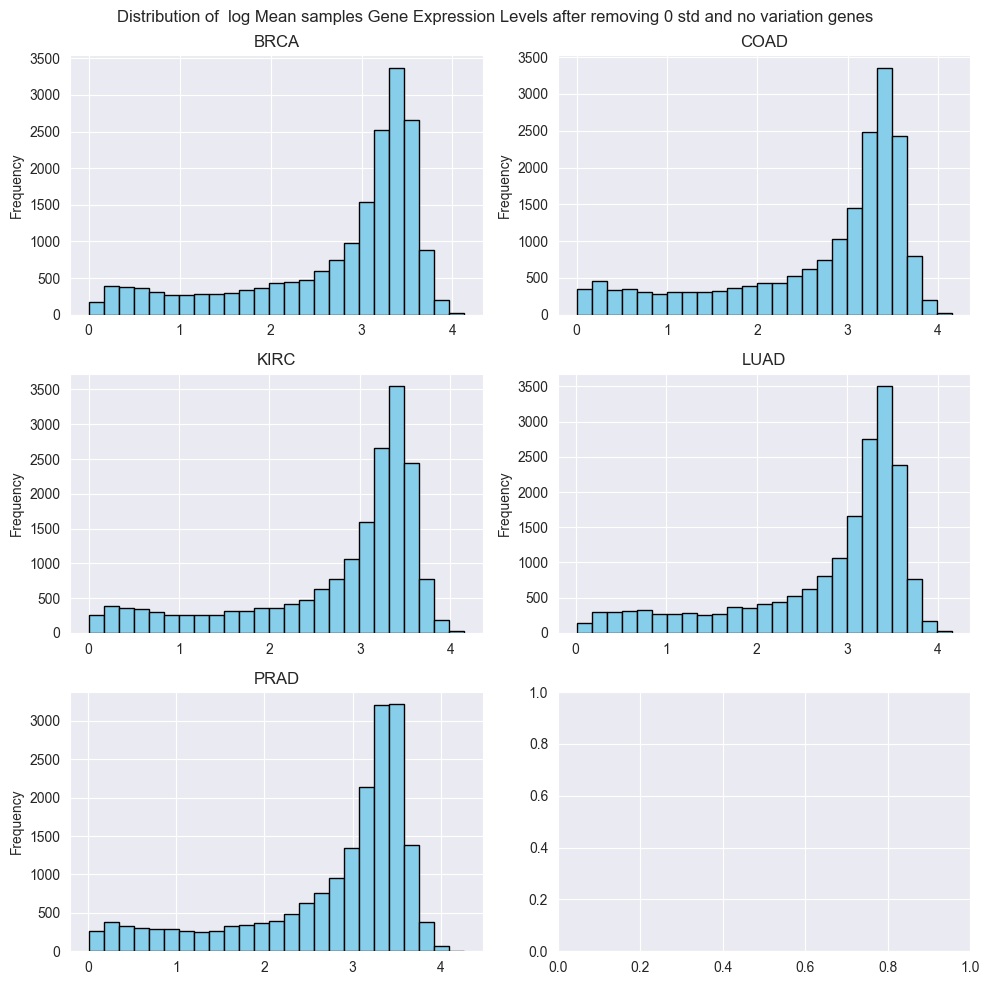

In [43]:
# I will pivot the table to perform anova test across the classes and see if the mean is different across the cancer classes
# Drop the last column since it has two classes

df_pivot_log=pd.pivot_table(filtered_df,index=["Class"],aggfunc="mean")

cancer_names = df_pivot_log.index.tolist()
fig, axes = plt.subplots(3, 2, figsize=(10, 10))
fig.suptitle('Distribution of  log Mean samples Gene Expression Levels after removing 0 std and no variation genes')
for i, ax in enumerate(cancer_names):
    df_pivot_log.loc[ax].plot(kind="hist", ax=axes[i//2, i%2], title=ax,color='skyblue', edgecolor='black',bins=25)
plt.tight_layout()
plt.show()



In [41]:
# Perform shapiro test to see if the data is normally distributed or not
from scipy.stats import shapiro

for i in range(5):
    stat, p = shapiro(df_pivot_log.iloc[i,:])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    
    alpha = 0.05
    if p > alpha:
        print("The mean distribution is normal (fail to reject H0)")
    else:
        print("The mean distribution is not normal (reject H0)")

Statistics=0.818, p=0.000
The mean distribution is not normal (reject H0)
Statistics=0.827, p=0.000
The mean distribution is not normal (reject H0)
Statistics=0.810, p=0.000
The mean distribution is not normal (reject H0)
Statistics=0.817, p=0.000
The mean distribution is not normal (reject H0)
Statistics=0.817, p=0.000
The mean distribution is not normal (reject H0)


C:\Users\pctes\AppData\Local\Temp\ipykernel_22068\770556218.py:5: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 18604.
  stat, p = shapiro(df_pivot_log.iloc[i,:])


In [389]:
# Perform anova test across the classes
# We are going to perform anova test to see if the mean is different across the classes
from scipy.stats import f_oneway

# Normal Anova procedure but it can be parallelized
cancer_names = filtered_df["Class"].unique()
gene_expression = filtered_df.iloc[:, 1:]

# Dictionary to store ANOVA results for each gene
anova_results = {}

# Loop through each gene
for gene in gene_expression.columns:
    class_data = [filtered_df.loc[filtered_df["Class"] == cancer][gene] for cancer in cancer_names]
    
    # Perform ANOVA for the gene expression data
    f_stat, p_value = f_oneway(*class_data)
    
    # Store results only if p-value < 0.05 (i.e., Reject H0)
    if p_value < 0.05:
        anova_results[gene] = {'F-statistic': f_stat, 'p-value': p_value}
        
        

In [52]:
from joblib import Parallel, delayed
from scipy.stats import f_oneway

# Define a function to compute ANOVA for a gene
def compute_anova(gene, filtered_df):
    anova_results = {}
    class_data = [filtered_df.loc[filtered_df["Class"] == cancer][gene] for cancer in cancer_names]
    f_stat, p_value = f_oneway(*class_data)
    if p_value < 0.05:
        anova_results[gene] = {'F-statistic': f_stat, 'p-value': p_value}
    return anova_results if anova_results else None

In [53]:
cancer_names = filtered_df["Class"].unique().tolist()
gene_expression = filtered_df.iloc[:, 1:]

# Parallelize the computation
# Use all available CPU cores
results = Parallel(n_jobs=-1)(delayed(compute_anova)(gene, filtered_df) for gene in gene_expression.columns)

# Filter out None results and convert the results to a dictionary
anova_results = {k: v for d in results if d for k, v in d.items()}

In [54]:
anova_results

{'gene_1': {'F-statistic': 17.63101226067374,
  'p-value': 7.085301638824813e-14},
 'gene_2': {'F-statistic': 45.11619012864316,
  'p-value': 3.569173111096813e-34},
 'gene_3': {'F-statistic': 104.64327752989492,
  'p-value': 1.2681455088849854e-71},
 'gene_4': {'F-statistic': 38.107214672147585,
  'p-value': 3.374340556294275e-29},
 'gene_6': {'F-statistic': 12.631989254851401,
  'p-value': 5.699569240851719e-10},
 'gene_7': {'F-statistic': 3.788571983977566, 'p-value': 0.004638053760856261},
 'gene_10': {'F-statistic': 24.246574865236543,
  'p-value': 5.927252335991803e-19},
 'gene_11': {'F-statistic': 6.711251339903471,
  'p-value': 2.5850688133030106e-05},
 'gene_12': {'F-statistic': 3.3312698708974136,
  'p-value': 0.010199011568708376},
 'gene_13': {'F-statistic': 7.970176322854193,
  'p-value': 2.6614934976736066e-06},
 'gene_14': {'F-statistic': 22.62706075866777,
  'p-value': 1.0118176897797838e-17},
 'gene_18': {'F-statistic': 471.6972752065929,
  'p-value': 2.719752507858675

In [55]:
# Without parallel computing, it took me around 20 minutes, and with parallel computing, it took me 10 minutes.

# Make anova_results into a dataframe
anova_results_df= pd.DataFrame.from_dict(anova_results, orient='index')
anova_results_df

F-statistic       p-value
gene_1        17.631012  7.085302e-14
gene_2        45.116190  3.569173e-34
gene_3       104.643278  1.268146e-71
gene_4        38.107215  3.374341e-29
gene_6        12.631989  5.699569e-10
...                 ...           ...
gene_20525    53.362750  7.373953e-40
gene_20526    25.057781  1.439948e-19
gene_20527     7.165495  1.139699e-05
gene_20528    21.159229  1.343056e-16
gene_20529    37.133456  1.699047e-28

[18463 rows x 2 columns]

In [63]:
#filtered_df_copy = filtered_df.copy()
#filtered_df_copy
print("Filtered dataframe before removing the genes with anova test p-value < 0.05:",filtered_df.shape)

Filtered dataframe before removing the genes with anova test p-value < 0.05: (801, 18605)


In [71]:
columns_to_select=anova_results_df.index.tolist()
reduced_genes = filtered_df.loc[:, ["Class"] + columns_to_select]

print("Filtered dataframe after removing the genes with anova test p-value < 0.05:",reduced_genes.shape)



Filtered dataframe after removing the genes with anova test p-value < 0.05: (801, 18464)


In [72]:
reduced_genes.head()

Class    gene_1    gene_2    gene_3    gene_4    gene_6    gene_7   gene_10  \
0  PRAD  1.593215  2.092724  2.695657  3.515006  3.031250  0.670723  0.670723   
1  LUAD  0.671504  1.372072  3.102013  3.409121  2.966440  0.000000  0.000000   
2  PRAD  2.173690  2.413377  2.978523  3.442377  2.994965  0.538633  0.000000   
3  PRAD  2.221450  2.461437  2.937169  3.484935  3.144597  0.520932  0.000000   
4  BRCA  1.870164  1.934157  2.914460  3.424689  2.919715  0.444648  0.000000   

    gene_11   gene_12  ...  gene_20520  gene_20521  gene_20522  gene_20523  \
0  1.222979  1.592345  ...    3.036545    2.567232    3.203241    3.422706   
1  0.667070  1.793522  ...    3.540927    2.483718    3.057254    3.425047   
2  0.538633  1.575855  ...    3.502843    2.614760    3.190160    3.573937   
3  0.520932  1.953916  ...    3.349765    2.823049    3.291745    3.477874   
4  1.186400  1.651318  ...    3.364401    2.806537    3.306178    3.507641   

   gene_20524  gene_20525  gene_20526  gene_20527  gene_20528  gene_20529  
0    3.039144    3.339111    3.700788    3.412882    3.310533    2.652317  
1    2.859291    3.229836    3.773422    3.525700    3.378214    1.629552  
2    2.678434    3.447790    3.328442    3.431404    3.471249    1.423859  
3    3.313653    3.406157    3.631417    3.418839    3.417429    2.101651  
4    3.032306    3.439212    3.691807    3.353006    3.386975    2.611260  

[5 rows x 18464 columns]

# perform PCA to see the relationship between the genes and the classes

In [75]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X=reduced_genes.iloc[:,1:] 
#  scale the data before performing PCA
scaler = StandardScaler()
X_scaled=scaler.fit_transform(reduced_genes.iloc[:,1:])


In [78]:
pca=PCA()
X_pca=pca.fit_transform(X_scaled)

Cumulative Variance explained by first 151 principal component(s): 0.8000


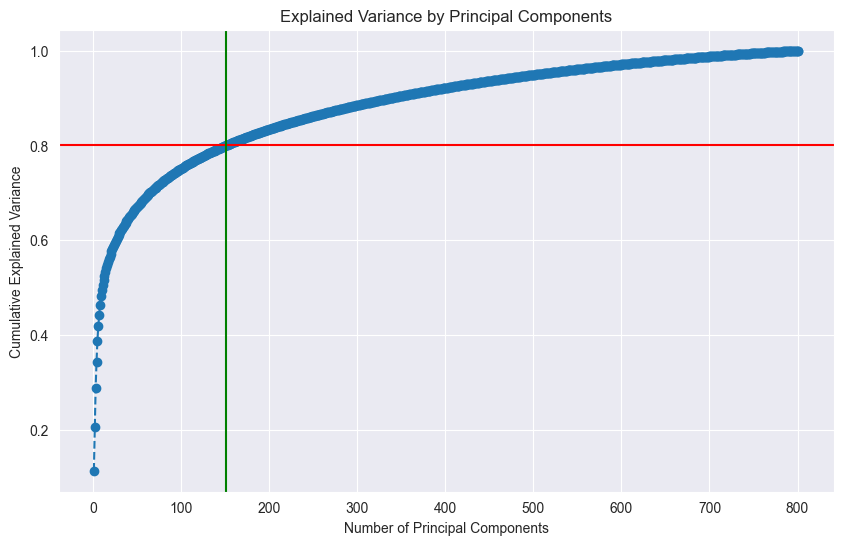

In [79]:
#Total variance explained by the principal components
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Print cumulative variance explained
variance_threshold =0.80
components_to_select=np.argmax(cumulative_variance >= variance_threshold) + 1
print(f"Cumulative Variance explained by first {components_to_select} principal component(s): {cumulative_variance[components_to_select-1]:.4f}")
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), cumulative_variance, marker='o', linestyle='--')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.axhline(y=variance_threshold, color='r', linestyle='-')
plt.axvline(x=components_to_select, color='g', linestyle='-')
plt.show()




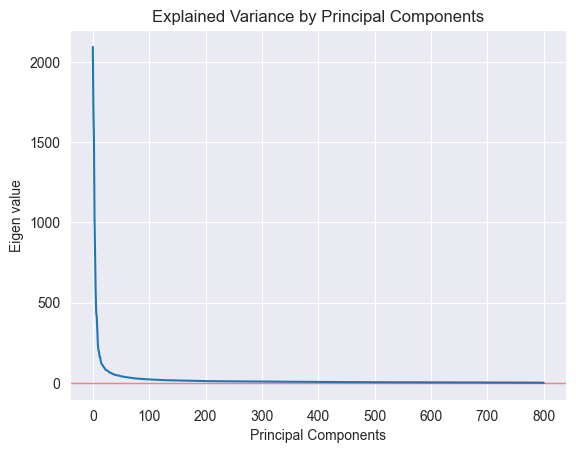

In [89]:
from matplotlib.pyplot import figure, show
from matplotlib.ticker import MaxNLocator

ax=figure().gca()
ax.plot(pca.explained_variance_)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.title('Explained Variance by Principal Components')
plt.xlabel('Principal Components')
plt.ylabel('Eigen value')
plt.axhline(y=1, linewidth=1, color='r', alpha=0.5)

plt.show()


In [175]:
# Plotting the PCA components

pca_151=PCA(n_components=151)
X_pca_151=pca_151.fit_transform(X_scaled)

#Plot the PCA  151 components 
# Plot the first two principal components

pca_151=pd.DataFrame(X_pca_151,columns=[f'PCA_{i+1}' for i in range(151)])

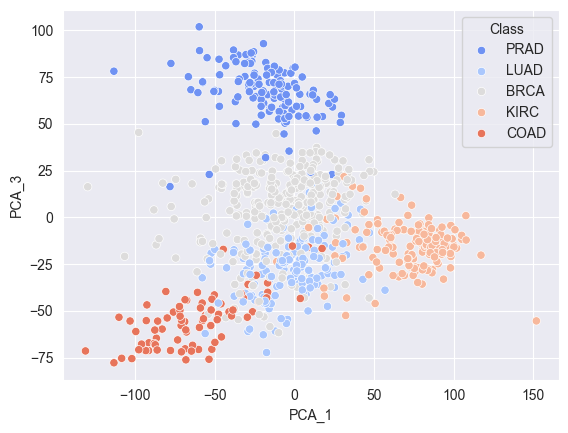

In [176]:
# Plot the first two principal components
pca_151["Class"]=reduced_genes["Class"]


sns.scatterplot(pca_151,x="PCA_1",y="PCA_3", hue="Class",palette="coolwarm",legend="full");


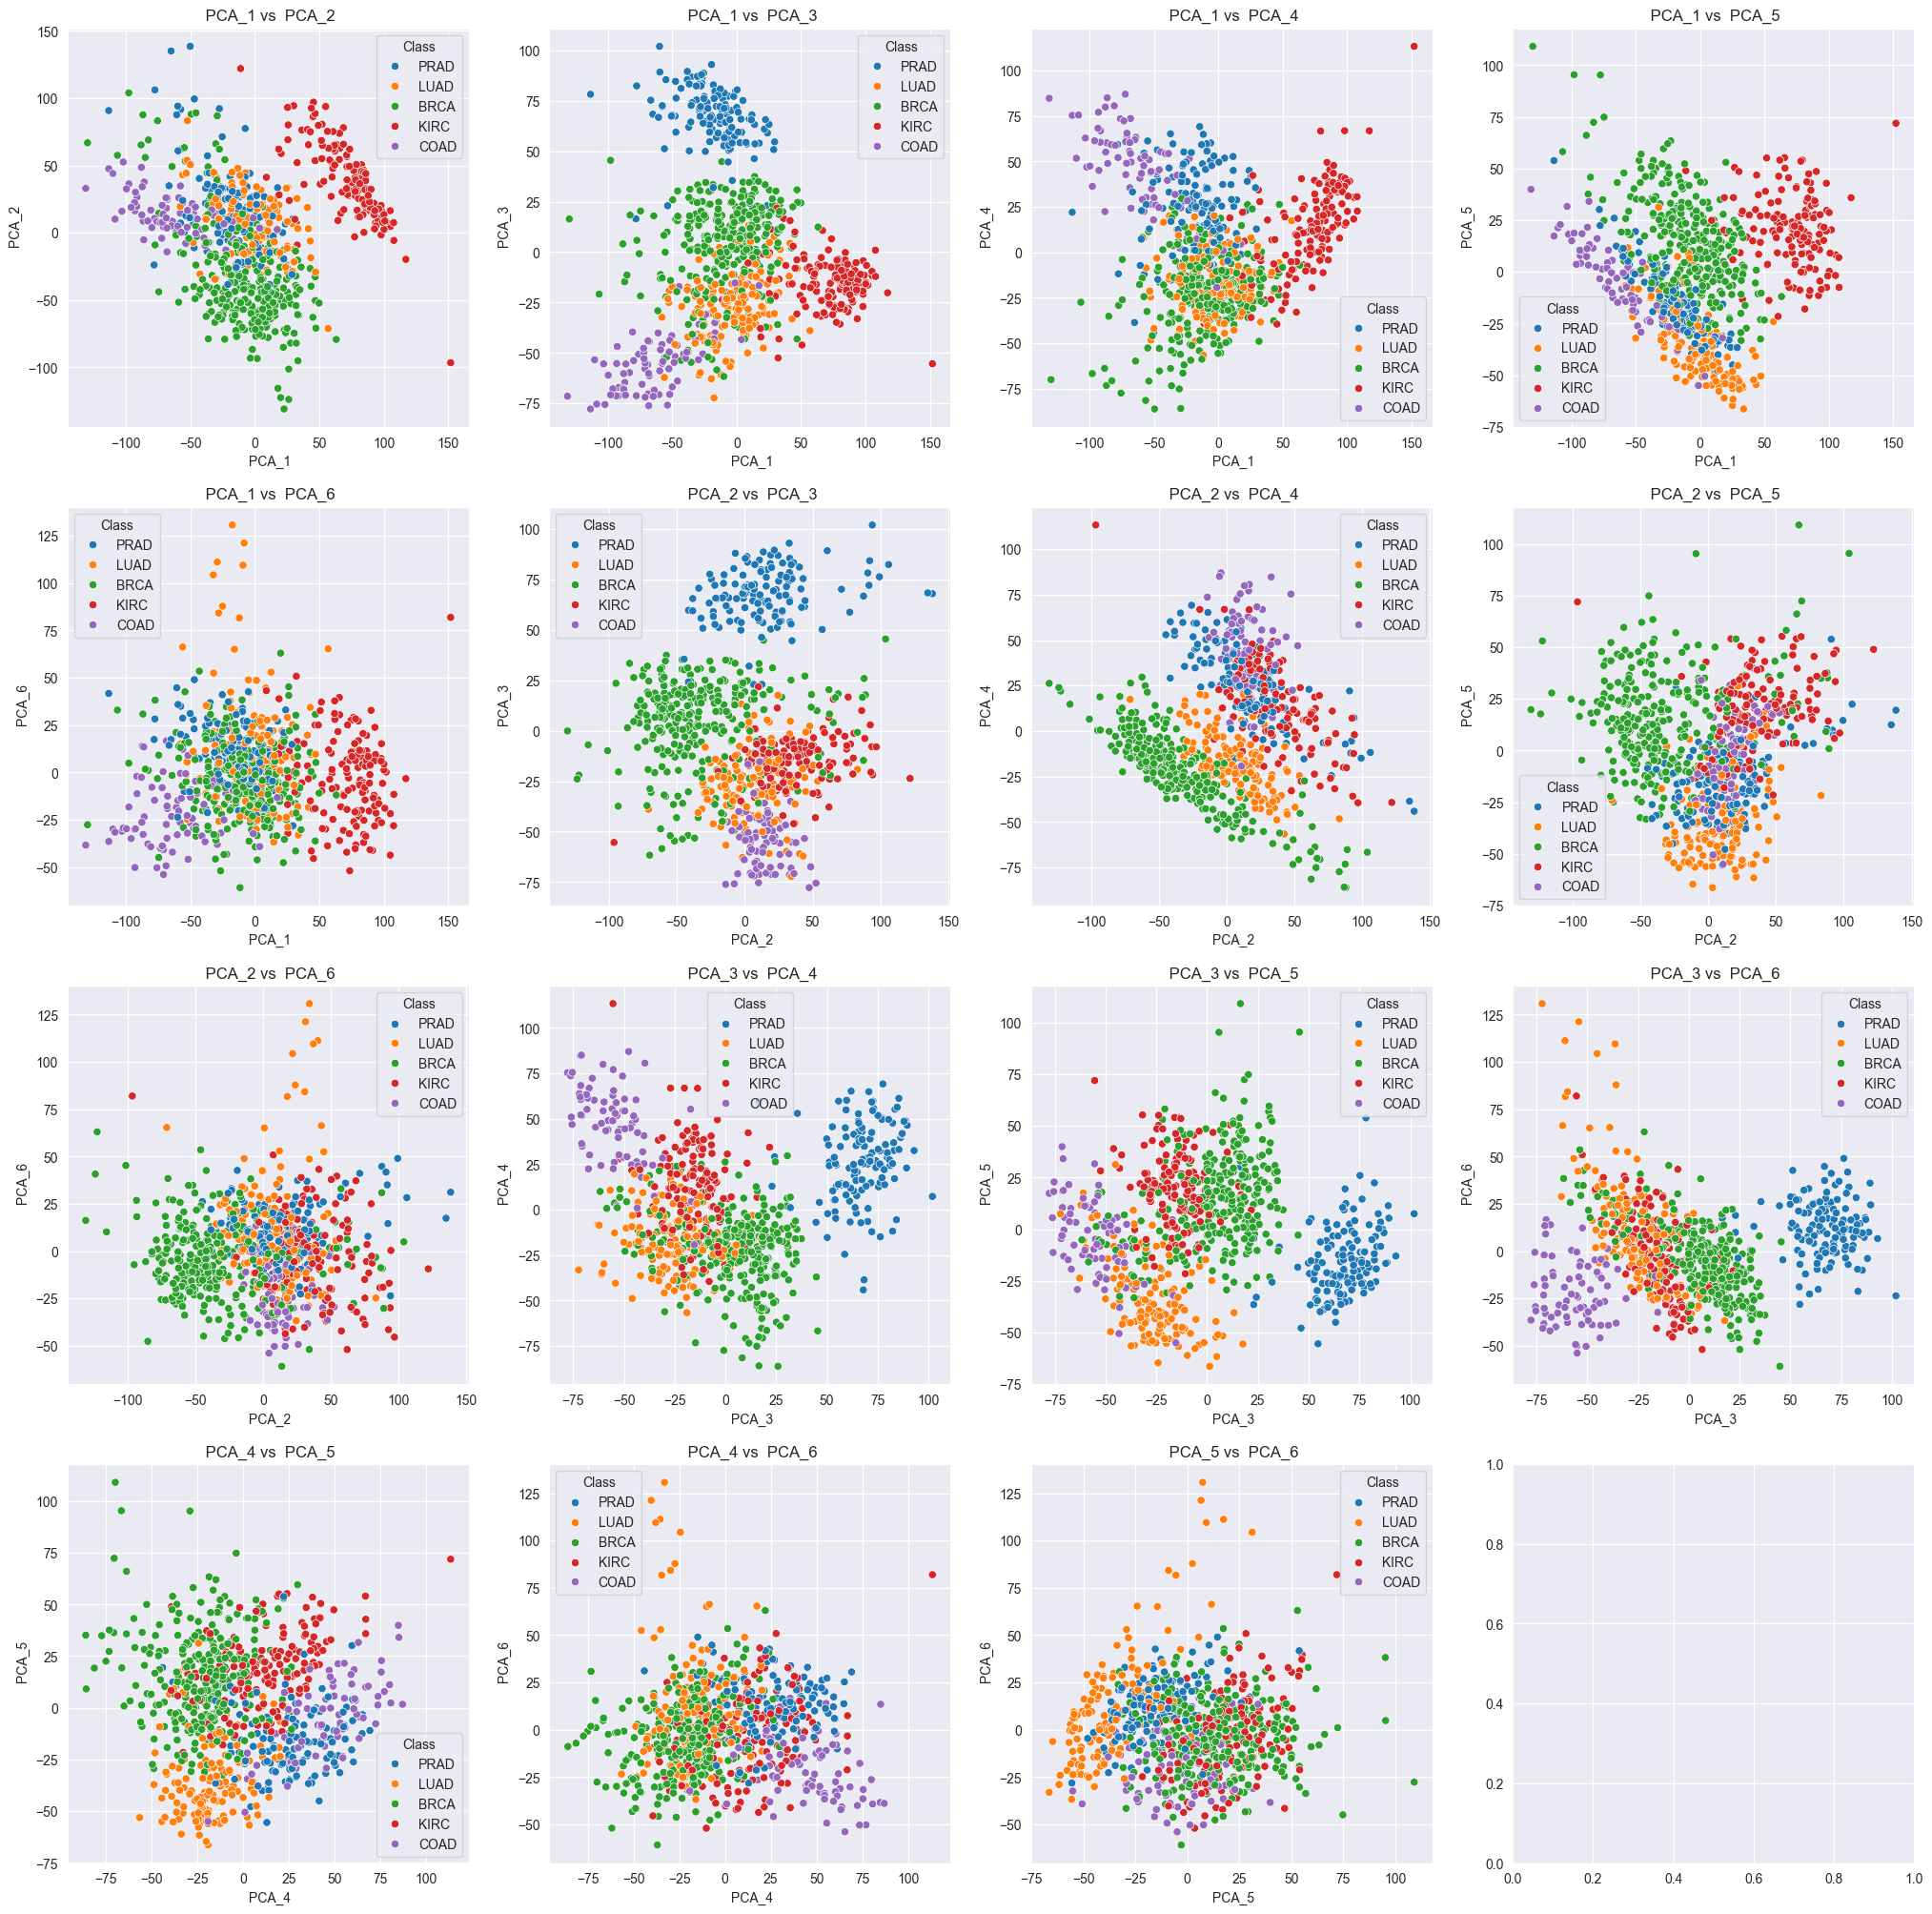

In [136]:
import itertools 

pca_components_to_plot=pca_151.columns[0:6].tolist()

fig,axes=plt.subplots(len(pca_components_to_plot)-2,len(pca_components_to_plot)-2,figsize=(25,25))

axes=axes.flatten()

for i,(pc1,pc2) in enumerate(itertools.combinations(pca_components_to_plot,2)):
    sns.scatterplot(data=pca_151,x=pc1,y=pc2,hue="Class",ax=axes[i],legend="full")
    axes[i].set_title(f" {pc1} vs  {pc2}")
    axes[i].set_xlabel(f" {pc1}")
    axes[i].set_ylabel(f" {pc2}")



In [99]:
# For PRAD PCA 2 AND PCA 3 are the most important components to separate the classes
# 

# Accessing the loadings 

In [201]:
# Let's compare to the square root and plot the distribution of the data across the classes
# I will apply a square root to all the dataset and plot again the histogram to see the distribution of the data across the classes
from sklearn.cluster import KMeans

X_scaled=pca_151.iloc[:,0:151]
kmeans_151=KMeans(n_clusters=5,n_init=10,random_state=42)
clusters=kmeans_151.fit_predict(X_pca_151)

pca_151["Cluster"]=clusters

pca_151["Cluster"].value_counts()

Cluster
2    248
4    202
1    145
0    134
3     72
Name: count, dtype: int64

In [178]:
pca_151.groupby("Cluster")["Class"].value_counts().unstack(fill_value=0)


Class    BRCA  COAD  KIRC  LUAD  PRAD
Cluster                              
0           0     0     0     0   134
1           0     0   145     0     0
2         245     0     0     2     1
3           0    72     0     0     0
4          55     6     1   139     1

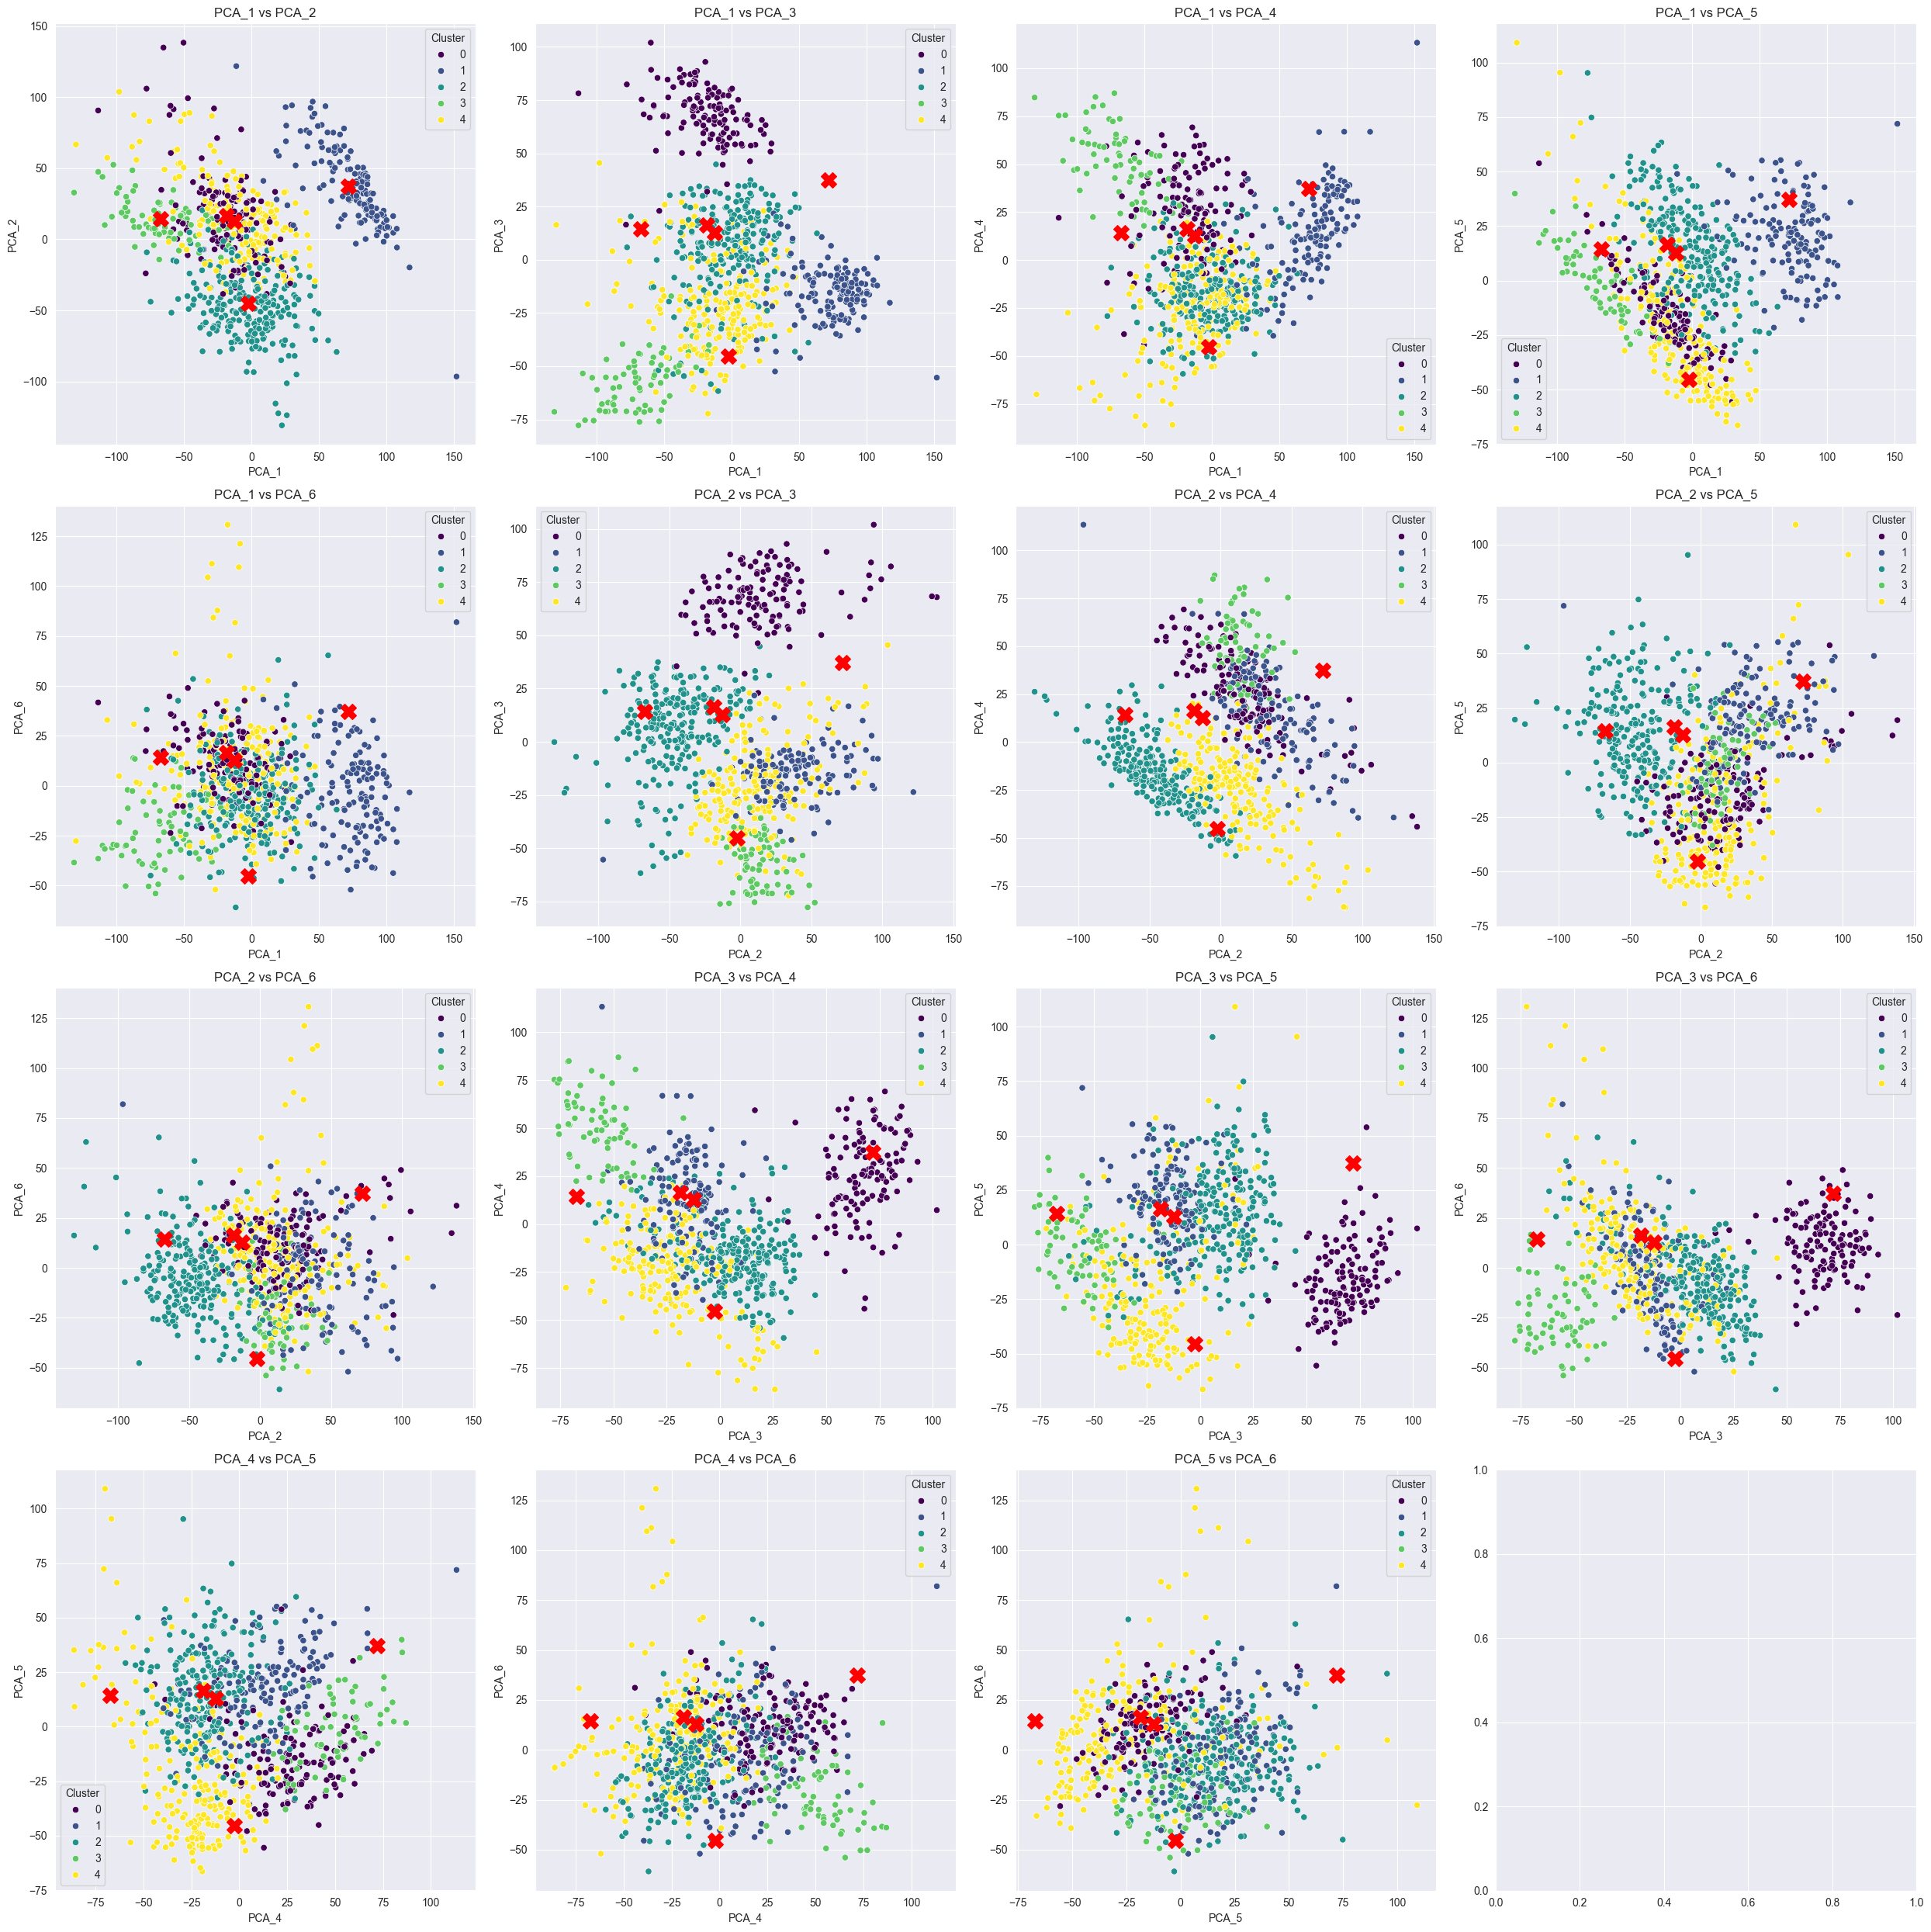

In [157]:
pca_components_to_plot = pca_151.columns[0:6].tolist()

fig, axes = plt.subplots(len(pca_components_to_plot) - 2, len(pca_components_to_plot) - 2, figsize=(25, 25))

axes = axes.flatten()

for i, (pc1, pc2) in enumerate(itertools.combinations(pca_components_to_plot, 2)):
    sns.scatterplot(data=pca_151, x=pc1, y=pc2, hue="Cluster", ax=axes[i], legend="full", palette="viridis")
    axes[i].scatter(kmeans_151.cluster_centers_[:,0], kmeans_151.cluster_centers_[:,1], s=200, c="red", marker="X")
    axes[i].set_title(f"{pc1} vs {pc2}")
    axes[i].set_xlabel(f"{pc1}")
    axes[i].set_ylabel(f"{pc2}")

plt.tight_layout()
plt.show()

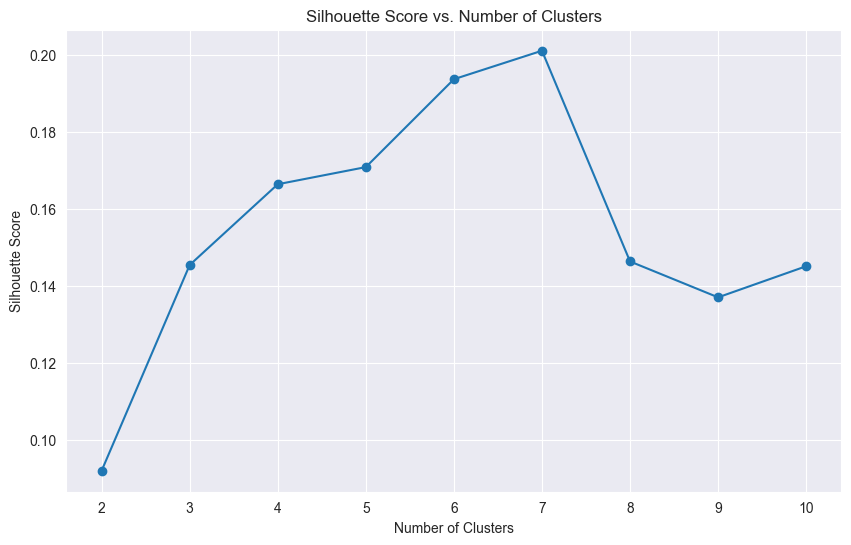

In [161]:
from sklearn.metrics import silhouette_score

silhouette_score(X_pca_151, clusters)

# Plot a silhouette score for the clusters

cluster_range = range(2, 11)  

# Initialize a list to store silhouette scores
silhouette_scores = []

# Iterate over each cluster number and compute the silhouette score
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(X_pca_151)
    silhouette_avg = silhouette_score(X_pca_151, clusters)
    silhouette_scores.append(silhouette_avg)


plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='-')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()

Text(0, 0.5, 'WCSS')

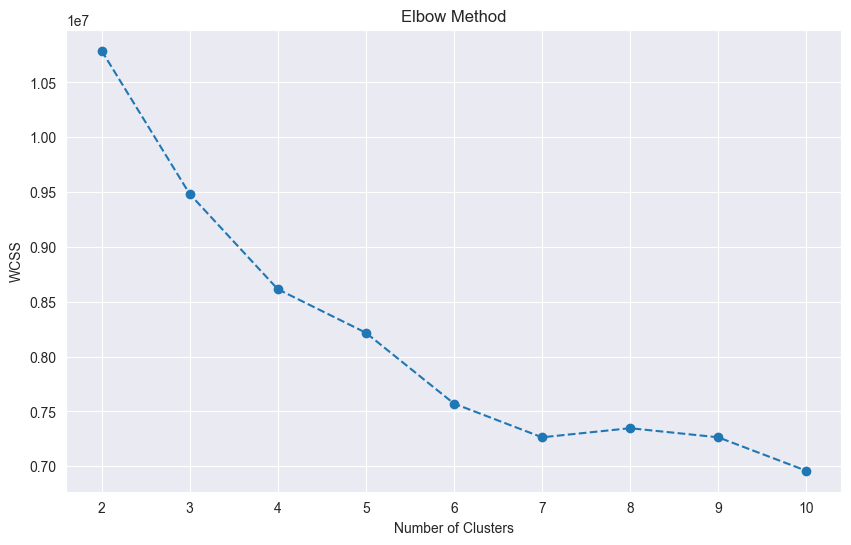

In [238]:
wcss=[]
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_pca_151)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

In [170]:
from sklearn.metrics import silhouette_score, adjusted_rand_score, normalized_mutual_info_score
from scipy.spatial.distance import pdist, squareform

#CLuster labels
cluster_labels = pca_151['Cluster']

#Create a pca_151 dataframe

#Squareform/condensed saves memory by only representing the upper triangular points
# Dunn Index
def dunn_index(X, labels):
    pairwise_distances = squareform(pdist(X))
    min_inter_cluster_distance = np.inf
    max_intra_cluster_diameter = 0

    for cluster_id in np.unique(labels):
        cluster_points = X[labels == cluster_id]
        intra_cluster_distances = pairwise_distances[np.ix_(labels == cluster_id, labels == cluster_id)]

        max_intra_cluster_diameter = max(max_intra_cluster_diameter, np.max(intra_cluster_distances))

        for other_cluster_id in np.unique(labels):
            if cluster_id != other_cluster_id:
                inter_cluster_distances = pairwise_distances[np.ix_(labels == cluster_id, labels == other_cluster_id)]
                min_inter_cluster_distance = min(min_inter_cluster_distance, np.min(inter_cluster_distances))

    dunn_index = min_inter_cluster_distance / max_intra_cluster_diameter
    return dunn_index


In [191]:
#To dont pass the class and cluster label column
dunn_index_value = dunn_index(pca_151.iloc[:,0:-2].values, cluster_labels.values)
print(f"Dunn Index: {dunn_index_value}")



# Corrected Rand Index
rand_index = adjusted_rand_score(pca_151['Class'], pca_151['Cluster'])
print(f"Rand Index: {rand_index}")

Dunn Index: 0.1445251006214875
Rand Index: 0.7867300367827883


In [193]:
from sklearn_extra.cluster import KMedoids

kmedoids = KMedoids(n_clusters=5, random_state=42)
kmedoids.fit(X_pca_151)
clusters_labels = kmedoids.labels_

pca_151["PAM_cluster"]=clusters_labels



#plt.scatter(X)

In [204]:
# Same Kmeans and Kmedois labels ? 
clusters in clusters_labels

True

In [205]:
#
pam_cluster_labels=clusters_labels

corrected_rand_index=adjusted_rand_score(pca_151["Class"],pam_cluster_labels)
print(f"Corrected Rand Index: {corrected_rand_index}")

#MEILA INDEX
meila_vi_pam= normalized_mutual_info_score(pca_151["Class"], pam_cluster_labels)
print(f"Meila VI: {meila_vi_pam}")


Corrected Rand Index: 0.327105195289639
Meila VI: 0.4700235275169956


In [101]:
# The corrected Rand index provides a measure for assessing the similarity between
# two partitions, adjusted for chance. Its range is -1 (no agreement) to 1 (perfect
# agreement)


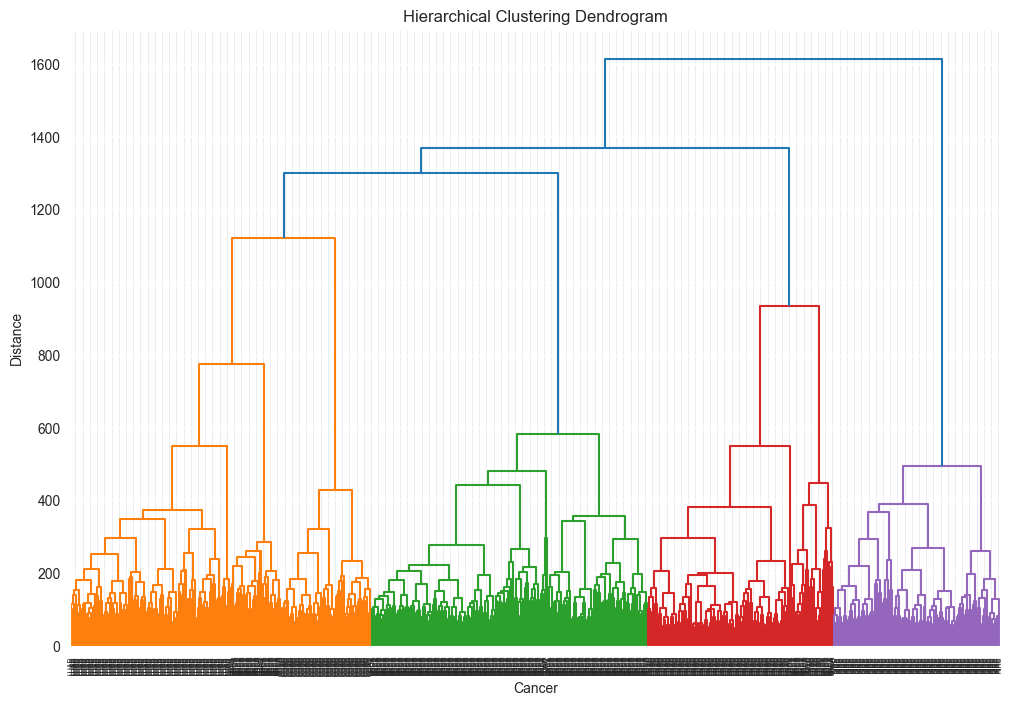

In [224]:
from scipy.cluster.hierarchy import linkage, dendrogram,fcluster
#Perform hierarchical clustering
Z = linkage(X_pca_151, method='ward', metric='euclidean')

#Plot the dendrogram

plt.figure(figsize=(12, 8))
dendrogram(Z, p=5, show_leaf_counts=True, labels=pca_151["Class"].tolist(),orientation='top',distance_sort='descending')
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Cancer')
plt.ylabel('Distance')
plt.show();

In [226]:
# Cluster label for from the hierarchical clustering
hierarchical_cluster_labels = fcluster(Z, 5, criterion='maxclust')
# Rand index
rand_index_hierarchical = adjusted_rand_score(pca_151["Class"], hierarchical_cluster_labels)
print(f"Rand Index: {rand_index_hierarchical}")

# Meila VI
meila_vi_hierarchical = normalized_mutual_info_score(pca_151["Class"], hierarchical_cluster_labels)
print(f"Meila VI: {meila_vi_hierarchical}")

Rand Index: 0.771927625995117
Meila VI: 0.838415202414779


In [235]:
# Start creating a Random Forest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
# We are going to encode the class column to numerical values

X=pca_151.iloc[:,0:-2] # Since it has two columns extra,class and clusters
y=pca_151["Class"]



In [253]:
# Encode the class variables using onehotencoder
encoder = OneHotEncoder()
# Transform the 1D array into a 2D array
y_encoded = encoder.fit_transform(y.values.reshape(-1, 1)).toarray()


print("Categories: ", encoder.categories_[0])
## HCPC HIerarchical clustering on principal components 

Categories:  ['BRCA' 'COAD' 'KIRC' 'LUAD' 'PRAD']


In [268]:
print("PRAD = 4")
print("LUAD = 3")
print("KIRC = 2")
print("COAD = 1")
print("BRCA = 0")

PRAD = 4
LUAD = 3
KIRC = 2
COAD = 1
BRCA = 0


In [264]:
y_encoded

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]])

In [244]:
# Split the data into training and testing sets for the PCA
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


OneHotEncoder()

In [250]:
y

0      PRAD
1      LUAD
2      PRAD
3      PRAD
4      BRCA
       ... 
796    BRCA
797    LUAD
798    COAD
799    PRAD
800    PRAD
Name: Class, Length: 801, dtype: object

In [ ]:
# Split the data into training and testing sets for the PCA 
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [234]:
# NOTES TO MYSELF 
# If it is time left ,try to implement make_pipeline and make_column_transformer method to
# simulate a real world scenario where you have to preprocess the data before feeding it to the model
# Also try to implement the KNNImputer to impute the missing values
# Also try to implement the OrdinalEncoder to transform the categorical variables to numerical



# OneHotEncoder returns a sparse matrix 


In [233]:
pca_151["Class"]

0      PRAD
1      LUAD
2      PRAD
3      PRAD
4      BRCA
       ... 
796    BRCA
797    LUAD
798    COAD
799    PRAD
800    PRAD
Name: Class, Length: 801, dtype: object

In [ ]:
# tree_pca = Pipeline([('pca', tml.DfPCA(n_components=0.95, compress=True)), 
# full_pipe = Pipeline([('proc', union_pipe), 
# ('scl', tml.DfScaler()),
# ('pca', tml.DfPCA(n_components=100))])('tree', DecisionTreeClassifier(random_state=34))])

In [48]:
# This is the equivalent In R studio

# distances <- dist(t(data), method = "euclidean")
# Compute hierarchical clustering linkage matrix
#linkage_matrix <- hclust(distances, method = "ward.D2")
# Plot dendrogram
#plot(linkage_matrix, hang = -1, main = "Hierarchical Clustering Dendrogram")

In [ ]:
# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(strategy="mean")

# this will make it possible to impute missing values not only on the training set, but
# also on the validation set, the test set, and any new data fed to the model.

# housing_num = housing.select_dtypes(include=[np.number])
# imputer.fit(housing_num)
# X = imputer.transform(housing_num)

# KNNImputer replaces each missing value with the mean of the k-nearest neighbors’
# values for that feature. The distance is based on all the available features.

In [ ]:
# To change the categorical variables to numerical 
#from sklearn.preprocessing import OrdinalEncoder
#ordinal_encoder = OrdinalEncoder()
# housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)